# set up

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

In [3]:
dpath = "/content/drive/MyDrive/finaltask/"

# 2

In [ ]:
food = pd.read_csv(dpath+ 'food mart data.csv')

In [ ]:
food.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,...,video_store,salad_bar,prepared_food,florist,cost,income,income_ratio,Unit price,Sales per square foot,Service density
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,...,0.0,0.0,0.0,0.0,62.09,8.609938,0.999993,2.87,0.000236,0.000000
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,121.80,4.999878,0.999976,2.50,0.000177,0.000035
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,...,0.0,0.0,0.0,0.0,83.51,14.079916,0.999994,3.52,0.000664,0.000047
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,...,0.0,0.0,0.0,0.0,66.78,4.019933,0.999983,1.34,0.000189,0.000047
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,...,1.0,1.0,1.0,1.0,111.51,2.129888,0.999948,0.71,0.000077,0.000181


In [ ]:
food.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [ ]:
food.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [ ]:
food.columns

Index(['id', 'store_sales(in millions)', 'unit_sales(in millions)',
       'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
       'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost', 'income', 'income_ratio', 'Unit price',
       'Sales per square foot', 'Service density'],
      dtype='object')

In [ ]:
# 매출 * 백만 - cost 계산하여 수입 변수 생성
food['income'] = (food['store_sales(in millions)'] * 1_000_000 - food['cost']) / 1_000_000

# 매출 대비 수입 비율 계산하여 변수 생성
food['income_ratio'] = food['income'] / food['store_sales(in millions)']

# Unit price: 제품 당 평균 가격
food['Unit price'] = food['store_sales(in millions)'] / food['unit_sales(in millions)']

# Sales per square foot: 제품 당 제곱 피트 당 매출
food['Sales per square foot'] = food['store_sales(in millions)'] / food['store_sqft']

# Service density: 매장 내 서비스 제공 밀도
service_columns = ['coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']
food['Service density'] = food[service_columns].sum(axis=1) / food['store_sqft']

In [ ]:
# 선택할 변수들
selected_variables = ['income', 'income_ratio', 'Sales per square foot', 'Service density', 'cost', 'Unit price', 'total_children', 'avg_cars_at home(approx).1', 'gross_weight', 'recyclable_package', 'low_fat']

# 선택된 변수들로 새로운 데이터프레임 생성
selected_df = food[selected_variables]

# 상관 관계 계산
correlation_matrix = selected_df.corr()

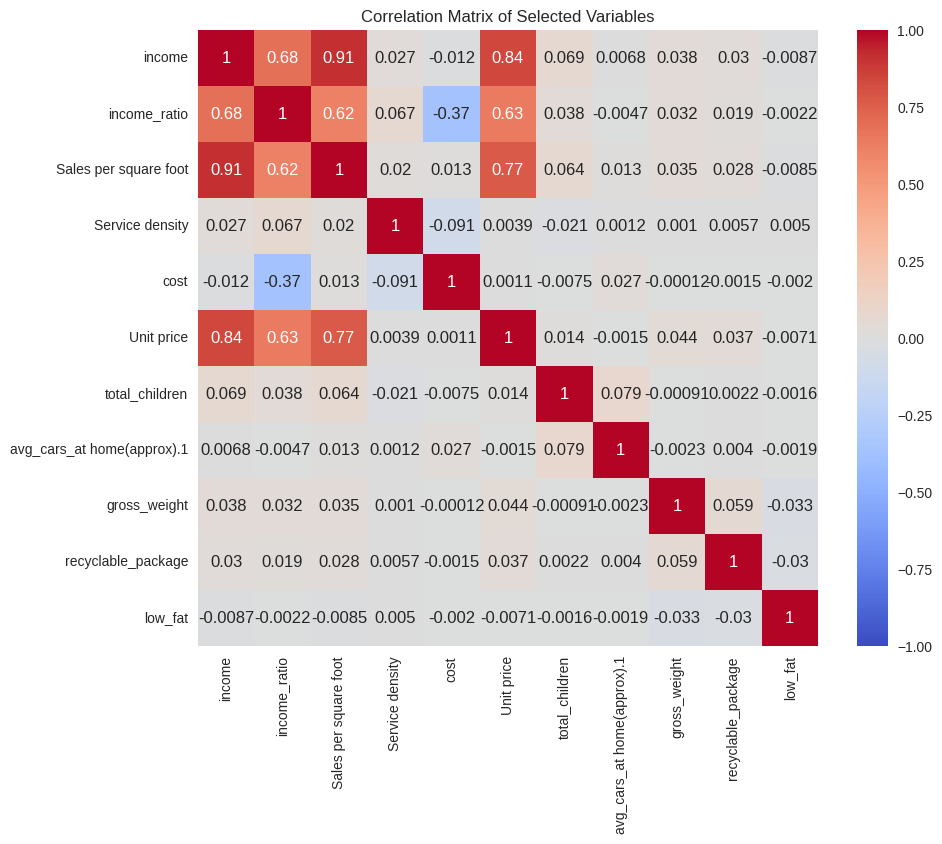

In [ ]:
# 상관 관계 행렬 시각화 (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [ ]:
selected_df.head()

,income,income_ratio,Sales per square foot,Service density,cost,Unit price,total_children,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat
0,8.609938,0.999993,0.000236,0.000000,62.09,2.87,2.0,2.0,10.30,1.0,0.0
1,4.999878,0.999976,0.000177,0.000035,121.80,2.50,4.0,3.0,6.66,1.0,0.0
2,14.079916,0.999994,0.000664,0.000047,83.51,3.52,0.0,3.0,21.30,1.0,0.0
3,4.019933,0.999983,0.000189,0.000047,66.78,1.34,5.0,0.0,14.80,0.0,1.0
4,2.129888,0.999948,0.000077,0.000181,111.51,0.71,5.0,3.0,17.00,1.0,1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create DataFrame
df_1 = pd.DataFrame(selected_df)

# Separate features (X) and target (y)
X = df_1.drop(columns=['cost'])
y = df_1['cost']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"  Mean Squared Error (MSE): {mse_linear}")
print(f"  R-squared (R2): {r2_linear}")
print()

# XGBoost Regression
xgb_reg = XGBRegressor(use_label_encoder=False, eval_metric='rmse', random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression:")
print(f"  Mean Squared Error (MSE): {mse_xgb}")
print(f"  R-squared (R2): {r2_xgb}")
print()

Linear Regression:
  Mean Squared Error (MSE): 665.4760423308475
  R-squared (R2): 0.25939793658877874

XGBoost Regression:
  Mean Squared Error (MSE): 2.1670256850423675
  R-squared (R2): 0.9975883373829864



In [ ]:
from pycaret.regression import *

In [ ]:
exp = setup(food, target='cost')

,Description,Value
0,Session id,3325
1,Target,cost
2,Target type,Regression
3,Original data shape,"(360336, 22)"
4,Transformed data shape,"(360336, 22)"
5,Transformed train set shape,"(252235, 22)"
6,Transformed test set shape,"(108101, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:22:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1751,0.0610,0.2470,0.9999,0.0028,0.0019,0.5960
dt,Decision Tree Regressor,1.8647,19.9344,4.4633,0.9777,0.0466,0.0197,0.8660
ridge,Ridge Regression,25.5473,876.9790,29.6137,0.0193,0.3164,0.2963,0.1190
br,Bayesian Ridge,25.5500,877.1645,29.6168,0.0191,0.3165,0.2963,0.1470
lasso,Lasso Regression,25.7047,883.8105,29.7288,0.0117,0.3179,0.2985,0.3500
llar,Lasso Least Angle Regression,25.7047,883.8105,29.7288,0.0117,0.3179,0.2985,0.1110
en,Elastic Net,25.7132,884.3226,29.7374,0.0111,0.3180,0.2986,0.1500
omp,Orthogonal Matching Pursuit,25.8400,892.1528,29.8688,0.0024,0.3195,0.3002,0.1120
knn,K Neighbors Regressor,26.7442,1016.9878,31.8901,-0.1373,0.3367,0.3063,4.2840
huber,Huber Regressor,29.9882,1307.8080,36.1556,-0.4624,0.3789,0.3278,0.3500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1751,0.0610,0.2470,0.9999,0.0028,0.0019,0.5960
et,Extra Trees Regressor,0.1574,0.1082,0.3284,0.9999,0.0036,0.0016,17.7490
xgboost,Extreme Gradient Boosting,0.9336,2.1836,1.4770,0.9976,0.0150,0.0099,0.4580
rf,Random Forest Regressor,0.9506,2.5838,1.6073,0.9971,0.0169,0.0101,50.4770
lightgbm,Light Gradient Boosting Machine,1.1778,2.8663,1.6926,0.9968,0.0170,0.0123,136.5580
dt,Decision Tree Regressor,1.8647,19.9344,4.4633,0.9777,0.0466,0.0197,0.8660
gbr,Gradient Boosting Regressor,23.8958,782.3236,27.9699,0.1252,0.2995,0.2762,10.2270
ada,AdaBoost Regressor,25.0863,844.5820,29.0615,0.0555,0.3110,0.2908,1.3360
ridge,Ridge Regression,25.5473,876.9790,29.6137,0.0193,0.3164,0.2963,0.1190
br,Bayesian Ridge,25.5500,877.1645,29.6168,0.0191,0.3165,0.2963,0.1470


LinearRegression(n_jobs=-1)